In [1]:
from pylab import *
import scipy.signal
f = open('h.csv')
lpf = f.readlines()
f.close()
lpf = asarray([float(i[:-1]) for i in lpf])

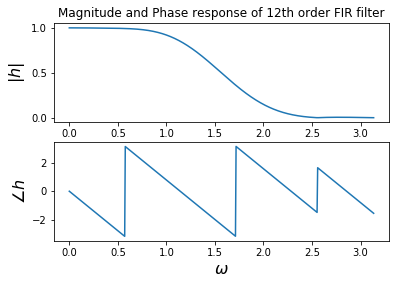

In [2]:
w,h = scipy.signal.freqz(lpf)
fig, (ax1, ax2) = plt.subplots(2, 1)
title("Magnitude and Phase response of 12th order FIR filter",pad = 125)

ax1.plot(w,abs(h))
ax2.plot(w,angle(h))
ax1.set_ylabel(r"$|h|$",size=16)

ax2.set_ylabel(r"$\angle{h}$",size=16)
ax2.set_xlabel(r"$\omega$",size=16)
savefig("img1.png")
plt.show()


In [3]:
import time

def con(a,b):
    X = len(a)
    K = len(b)
    b = b[::-1]
    y = np.zeros(X+K-1)    
    for i in range(1,X+K):
        y[i-1] = sum(a[max(0,i-K):min(X,i)]*b[max(0,K-i):min(K+X-i,K)])
    return y


0.009414911270141602


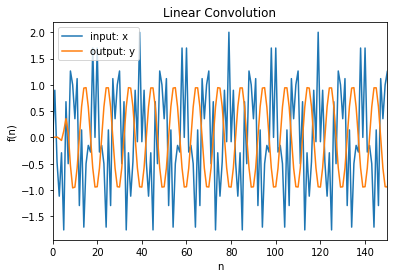

In [4]:
n= arange(1,2**10+1)
x = lambda n: cos(0.2*pi*n)+cos(0.85*pi*n)
inp = x(n)
start = time.time()

out = con(inp,lpf)
#out = np.convolve(inp,lpf)
end = time.time()
print(end - start)
figure(1)
plot(inp)
plot(out)
xlabel("n")
ylabel("f(n)")
title("Linear Convolution")
legend(("input: x",'output: y'))
xlim(0,150)
show()


(1024,)
0.0008749961853027344


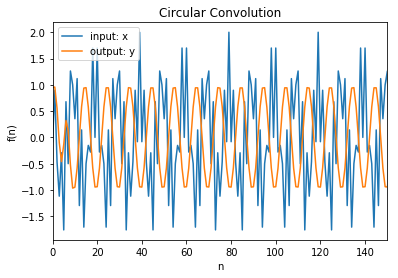

In [5]:
start = time.time()
something = concatenate((lpf,zeros(len(inp)-len(lpf))))
print(something.shape)
y1 = ifft(fft(inp)*fft(something));
end = time.time()
print(end - start)
figure(2)
plot(inp)
plot(real(y1))
xlim(0,150)
xlabel("n")
ylabel("f(n)")
title("Circular Convolution")
legend(("input: x",'output: y'))

show()

0.018454790115356445


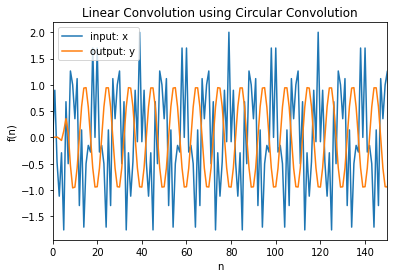

In [13]:
padded_h = concatenate((lpf,zeros(4)))
x_split = asarray(split(inp,len(inp)//(2*len(padded_h))))
out = np.zeros(len(padded_h)+len(inp)-1)
index = 0
n_iter =len(x_split)
L = len(x_split[0])
P = len(padded_h)
N = L+P-1
start = time.time()
for i in range(n_iter):
    out[index:index+N] += con(x_split[i],padded_h) 
    index +=L
end = time.time()
print(end-start)
figure(3)
plot(inp)
plot(out)
xlim(0,150)
xlabel("n")
ylabel("f(n)")
title("Linear Convolution using Circular Convolution")
legend(("input: x",'output: y'))

show()


In [7]:
f1 =open("x1.csv")
zc = f1.readlines()
zc  = asarray([complex(i[:-1].replace('i','j')) for i in zc],dtype = 'complex')

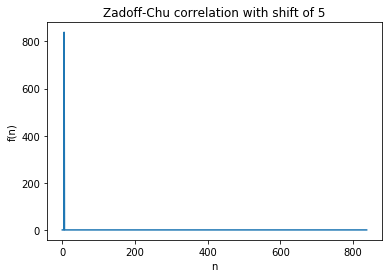

In [8]:
zcshift = np.concatenate((zc[-5:],zc[:-5]))
op = ifft(conj(fft(zc))*(fft(zcshift)));
plot(abs(op))
xlabel("n")
ylabel("f(n)")
title("Zadoff-Chu correlation with shift of 5")
show()